In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col = 0)

In [3]:
df.index

DatetimeIndex(['2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18',
               ...
               '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1304, freq=None)

In [4]:
bottom = df['value'].quantile(0.025)
bottom

17876.4

In [5]:
top = df['value'].quantile(0.975)
top

177613.075

In [6]:
df = df[(df['value'] <= top) & (df['value'] >= bottom)]

In [7]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


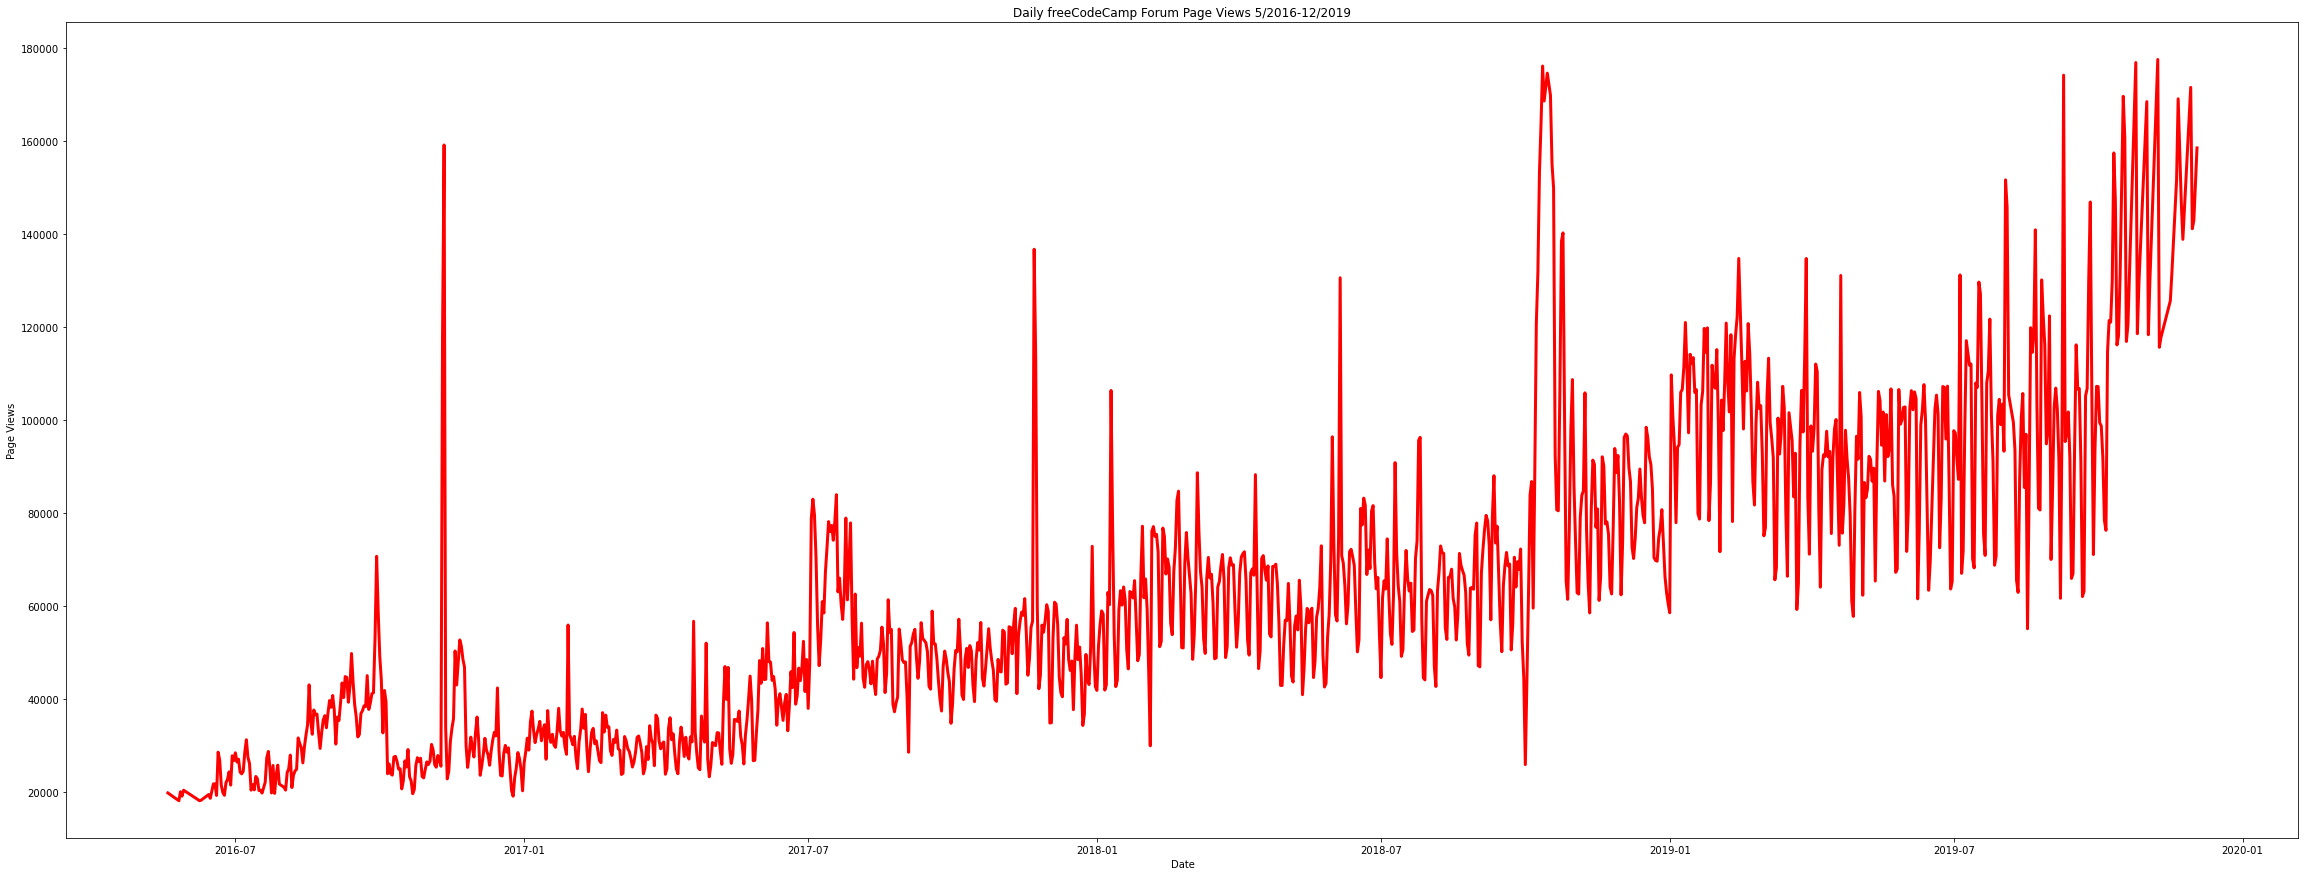

In [8]:
fig = plt.figure(figsize=(40, 15))
plt.plot(df.index, df['value'].values, c ='red', linewidth = 3)
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

plt.show()

In [9]:
fig.savefig('line_plot.png')

In [10]:
df_bar = df.copy()

In [11]:
df_bar

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [12]:
df_bar['Months'] = df.index.month_name()

In [13]:
df_bar

,value,Months
date,,
2016-05-19,19736,May
2016-05-26,18060,May
2016-05-27,19997,May
2016-05-28,19044,May
2016-05-29,20325,May
...,...,...
2019-11-24,138875,November
2019-11-29,171584,November
2019-11-30,141161,November


In [14]:
df_bar['Year'] = df.index.year

In [15]:
df_bar

,value,Months,Year
date,,,
2016-05-19,19736,May,2016
2016-05-26,18060,May,2016
2016-05-27,19997,May,2016
2016-05-28,19044,May,2016
2016-05-29,20325,May,2016
...,...,...,...
2019-11-24,138875,November,2019
2019-11-29,171584,November,2019
2019-11-30,141161,November,2019


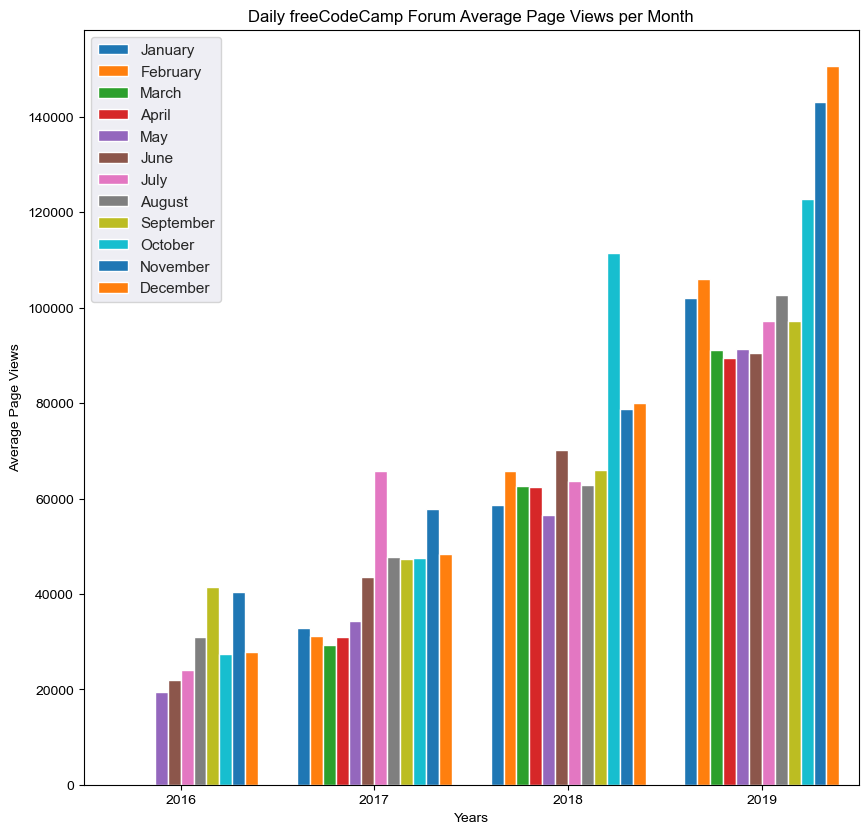

In [16]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")
sns.set(rc = {'figure.figsize':(8,8)})
hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

chart = sns.barplot(x='Year', y='value', data= df_bar, hue='Months', estimator=np.mean, palette='tab10',
            ci= None, hue_order=hue_order, saturation=1)
chart.set(xlabel ="Years", ylabel = 'Average Page Views')
chart.legend(loc= 'upper left')
fig.savefig('bar_plot.png')

In [17]:
df_box = df.copy() 
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [18]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

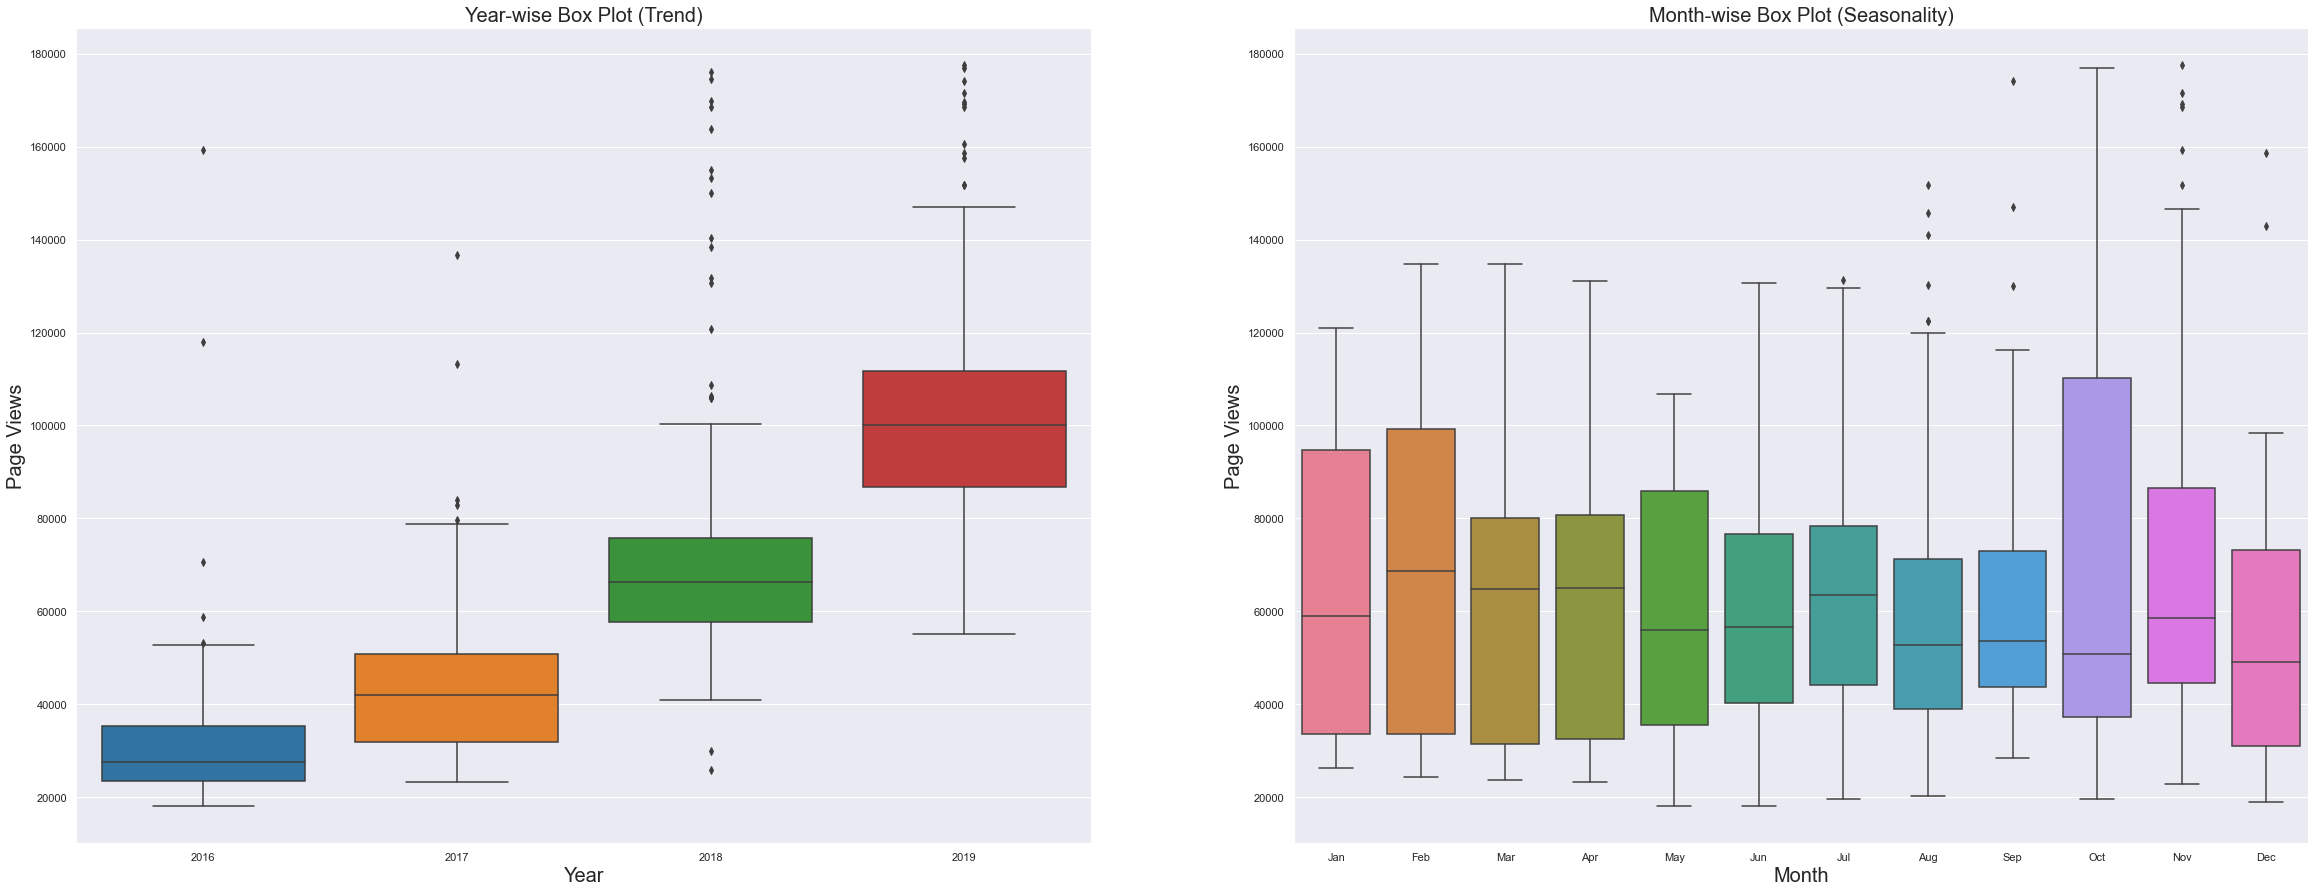

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(40, 15))
sns.boxplot(x= 'year', y='value', data= df_box, palette='tab10', ax=ax[0])
ax[0].set_title("Year-wise Box Plot (Trend)", fontsize=20)
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_ylabel("Page Views", fontsize=20)
sns.boxplot(x= 'month', y='value', data= df_box, order=month_order, palette='husl',ax=ax[1])
ax[1].set_title("Month-wise Box Plot (Seasonality)", fontsize=20)
ax[1].set_xlabel('Month', fontsize=20)
ax[1].set_ylabel("Page Views", fontsize=20)
fig.savefig('box_plots.png')